Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5904 - loss: 0.7186 - val_accuracy: 0.6800 - val_loss: 0.5809
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6723 - loss: 0.5649 - val_accuracy: 0.7200 - val_loss: 0.5127
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7186 - loss: 0.4920 - val_accuracy: 0.7200 - val_loss: 0.4587
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7975 - loss: 0.4249 - val_accuracy: 0.8000 - val_loss: 0.4091
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8388 - loss: 0.3953 - val_accuracy: 0.8800 - val_loss: 0.3608
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8897 - loss: 0.3394 - val_accuracy: 0.9200 - val_loss: 0.3121
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8748 - loss: 0.3347 - val_accuracy: 0.9400 - val_loss: 0.2684
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9036 - loss: 0.2749 - val_accuracy: 0.9400 - val_loss: 0.2342
Ep

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step

🔍 Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.95      0.98        22

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

🔄 Confusion Matrix:
 [[28  0]
 [ 1 21]]


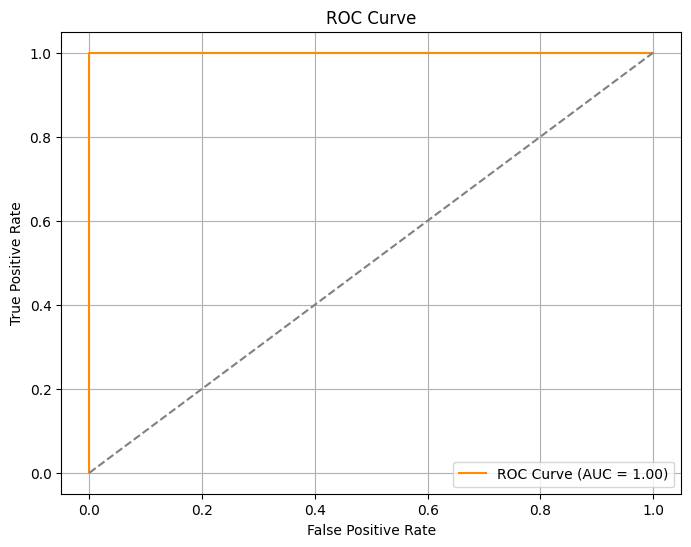

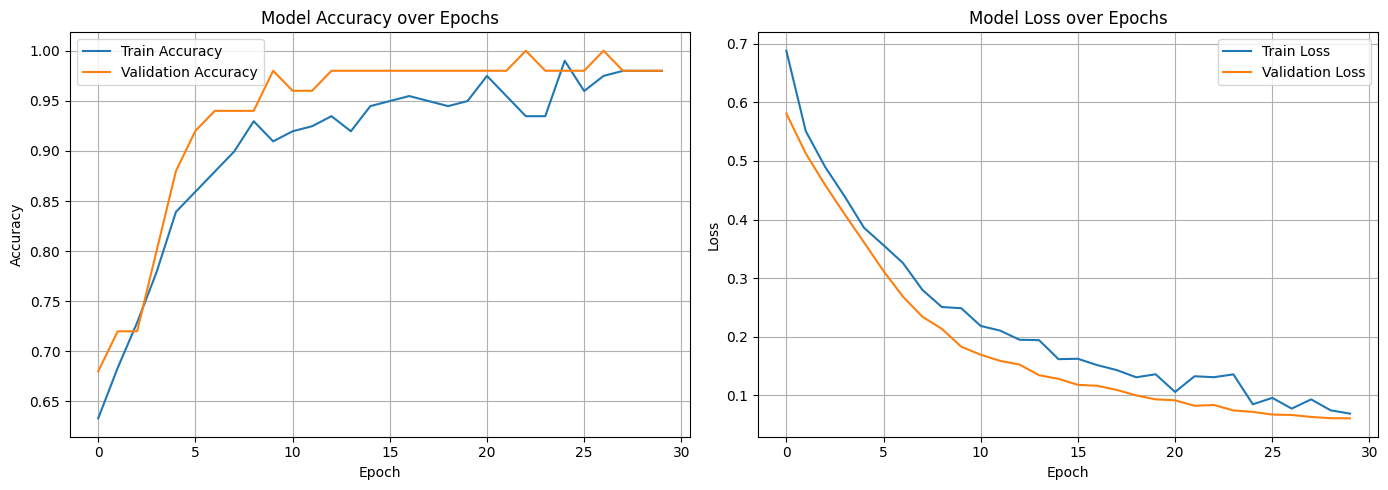

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# --- Load Dataset ---
df = pd.read_csv('/content/Final_data_fit_unfit(after_edit).csv')

# --- Preprocessing ---
df_encoded = pd.get_dummies(df, columns=['Lower Extremities', 'Upper Extremities'])
df_encoded['Physique-Condition'] = df_encoded['Physique-Condition'].map({'Fit': 0, 'Unfit': 1})

X = df_encoded.drop('Physique-Condition', axis=1)
y = df_encoded['Physique-Condition']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# --- Build ANN Model (Manual Hyperparameters) ---
model = Sequential()
model.add(Dense(64, input_shape=(X.shape[1],), activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# --- Train the Model ---
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=30,
                    batch_size=16,
                    verbose=1)

# --- Predictions ---
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

# --- Evaluation ---
print("\n🔍 Classification Report:\n", classification_report(y_test, y_pred))
print("🔄 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# --- ROC Curve ---
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# --- Accuracy & Loss Plots ---
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

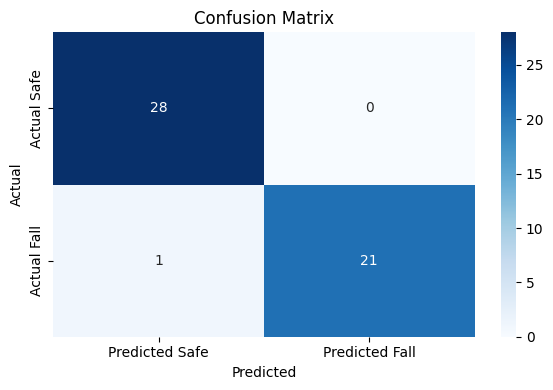

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- Compute Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)

# --- Plot Confusion Matrix ---
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Safe', 'Predicted Fall'],
            yticklabels=['Actual Safe', 'Actual Fall'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()